In [2]:
import numpy as np
import my_statistics as stat
import scipy as sc
from datetime import datetime, timedelta
import pandas as pd

In [3]:
import sys

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib nbagg

### Gathering and Plotting the data for Given Time Frame

In [6]:
james_bay_min = np.loadtxt("Data/AllStations_temperature_minute_data_2019/JamesBay_temperature_2019.dat")

In [7]:
james_bay_min_time = np.linspace(james_bay_min[0], james_bay_min[1], int(james_bay_min[2]))
james_bay_min_temp = james_bay_min[3:]

In [8]:
#len(james_bay_min_temp) == james_bay_min[2] #Check to see if accurate

In [9]:
all_hour = np.loadtxt("Data/AllStations_temperature_hour_data_2019.dat")

In [10]:
#all_hour[0][16]  #To find column for james bay data in this table; checking to see if right Longitude

In [11]:
james_bay_hour_temp = np.zeros(len(all_hour) - 2)
james_bay_hour_time = np.zeros(len(all_hour) - 2)
for i in range(2, len(all_hour)):
    james_bay_hour_time[i-2] = all_hour[i][0]    
    james_bay_hour_temp[i-2] = all_hour[i][16]

In [12]:
epoch = datetime(1, 1, 1)
james_bay_min_time_pretty = [epoch + timedelta(days=x-367.0 - 7.0/24) for x in james_bay_min_time] #changing to Victoria time for July
james_bay_hour_time_pretty = [epoch + timedelta(days=y-367.0) for y in james_bay_hour_time]

In [13]:
#james_bay_hour_dict = {'Time':james_bay_hour_time_pretty, 'Temperature': james_bay_hour_temp}

#james_bay_hour_df = pd.DataFrame(james_bay_hour_dict)

#james_bay_min_dict = {'Time':james_bay_min_time_pretty, 'Temperature': james_bay_min_temp}

#james_bay_min_df = pd.DataFrame(james_bay_min_dict)

In [14]:
datetime.now() #(year, month, date, hour, minute, second, microsecond) -> in UTC

datetime.datetime(2019, 11, 6, 16, 51, 16, 394536)

In [15]:
hour_res_1_time = []
hour_res_1_temp = []
hour_res_2_time = []
hour_res_2_temp = []

for i in range(len(james_bay_hour_time)):
    time = james_bay_hour_time_pretty[i]
    
    stop_when = time.year == 2016 and time.month == 10 and time.day == 1   
    
    if time.year == 2015:
        if time.month >= 11:
            hour_res_1_time.append(time)
            hour_res_1_temp.append(james_bay_hour_temp[i])            
    if time.year == 2016:
        if time.month <= 2:
            hour_res_1_time.append(time)
            hour_res_1_temp.append(james_bay_hour_temp[i])
        if time.month == 3 and time.day <= 15:
            hour_res_1_time.append(time)
            hour_res_1_temp.append(james_bay_hour_temp[i])
        if time.month >= 5 and time.day >= 15:
            hour_res_2_time.append(time)
            hour_res_2_temp.append(james_bay_hour_temp[i]) 
        if time.month >= 6:
            hour_res_2_time.append(time)
            hour_res_2_temp.append(james_bay_hour_temp[i]) 
    if stop_when:
        print("Done")
        break

Done


In [16]:
min_res_1_time = []
min_res_1_temp = []
min_res_2_time = []
min_res_2_temp = []

for i in range(len(james_bay_min_time)):
    time = james_bay_min_time_pretty[i]
    
    stop_when = time.year == 2016 and time.month == 10 and time.day == 1   
    
    if time.year == 2015:
        if time.month >= 11:
            min_res_1_time.append(time)
            min_res_1_temp.append(james_bay_min_temp[i])            
    if time.year == 2016:
        if time.month <= 2:
            min_res_1_time.append(time)
            min_res_1_temp.append(james_bay_min_temp[i])
        if time.month == 3 and time.day <= 15:
            min_res_1_time.append(time)
            min_res_1_temp.append(james_bay_min_temp[i])
        if time.month >= 5 and time.day >= 15:
            min_res_2_time.append(time)
            min_res_2_temp.append(james_bay_min_temp[i]) 
        if time.month >= 6:
            min_res_2_time.append(time)
            min_res_2_temp.append(james_bay_min_temp[i]) 
    if stop_when:
        print("Done")
        break

Done


In [17]:
hour_1_dict = {'Time':hour_res_1_time, 'Temperature': hour_res_1_temp}
hour_1_df = pd.DataFrame(hour_1_dict)
min_1_dict = {'Time':min_res_1_time, 'Temperature': min_res_1_temp}
min_1_df = pd.DataFrame(min_1_dict)
hour_2_dict = {'Time':hour_res_2_time, 'Temperature': hour_res_2_temp}
hour_2_df = pd.DataFrame(hour_2_dict)
min_2_dict = {'Time':min_res_2_time, 'Temperature': min_res_2_temp}
min_2_df = pd.DataFrame(min_2_dict)

In [18]:
min_1_df

,Time,Temperature
0,2015-11-01 00:00:00.231743,10.11
1,2015-11-01 00:01:00.231739,10.11
2,2015-11-01 00:02:00.231736,10.11
3,2015-11-01 00:03:00.231742,10.11
4,2015-11-01 00:04:00.231739,10.11
...,...,...
195835,2016-03-15 23:55:00.246536,6.28
195836,2016-03-15 23:56:00.246533,6.28
195837,2016-03-15 23:57:00.246529,6.26
195838,2016-03-15 23:58:00.246536,6.22


In [19]:
hour_1_df

,Time,Temperature
0,2015-11-01 00:00:00.000000,10.14
1,2015-11-01 01:00:02.879995,10.08
2,2015-11-01 01:59:57.120005,10.42
3,2015-11-01 03:00:00.000000,10.00
4,2015-11-01 04:00:02.879995,9.45
...,...,...
3259,2016-03-15 19:00:02.879995,7.47
3260,2016-03-15 19:59:57.120005,7.09
3261,2016-03-15 21:00:00.000000,6.85
3262,2016-03-15 22:00:02.879995,6.69


<IPython.core.display.Javascript object>


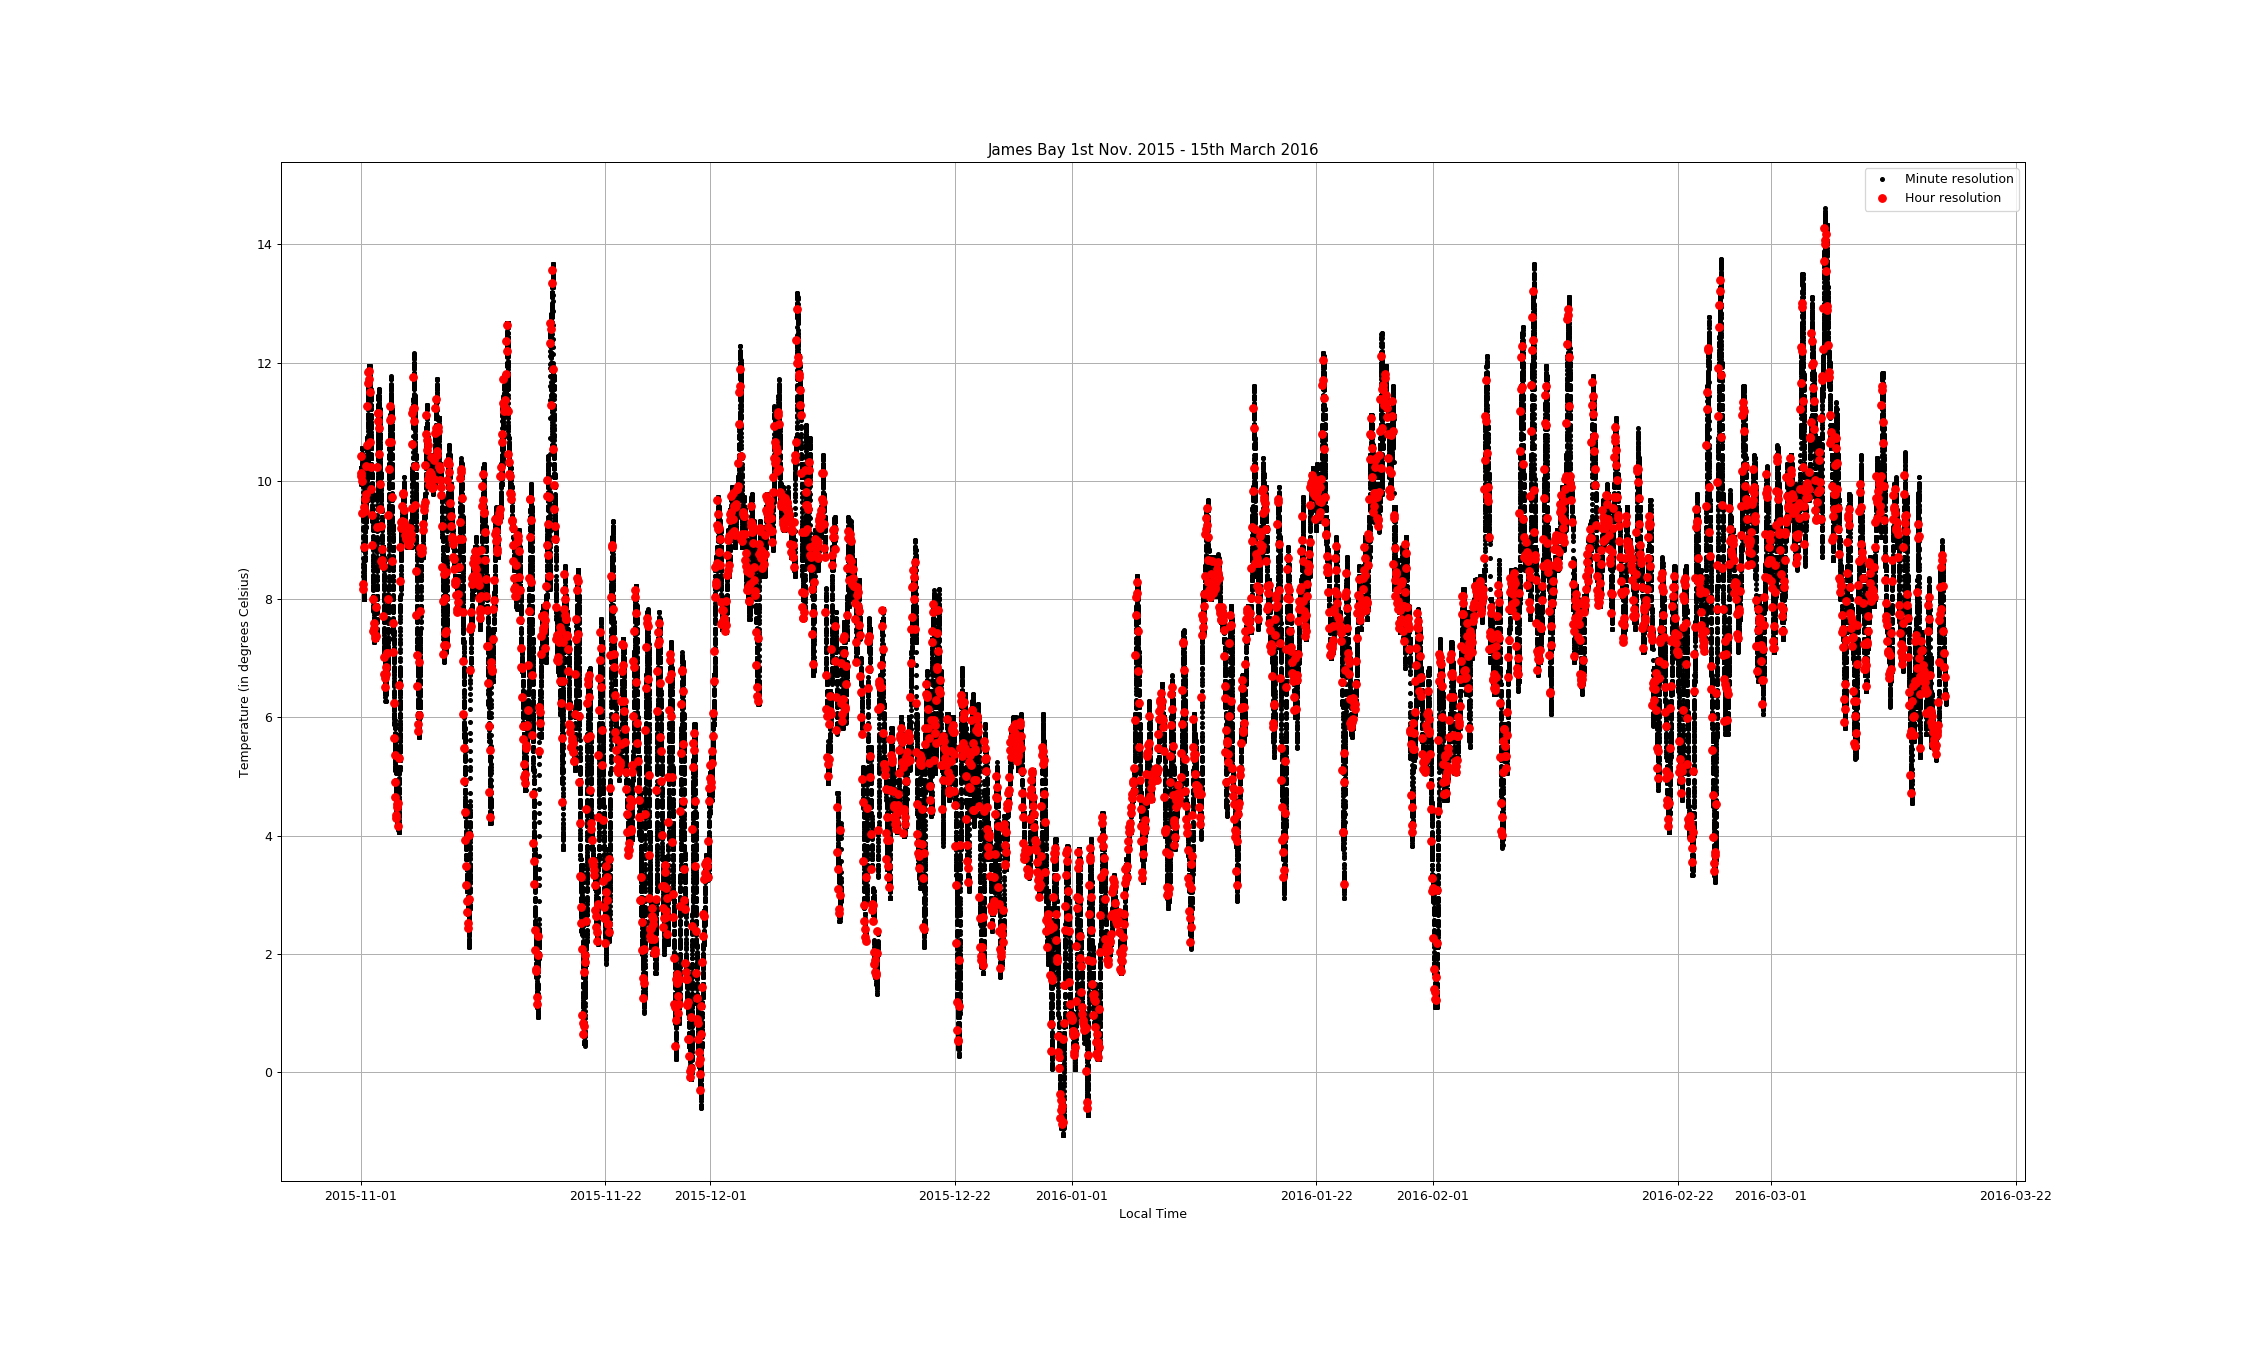

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [20]:
plt.close()
plt.figure(figsize=(25,15))
plt.plot(min_res_1_time, min_res_1_temp, 'k.', label="Minute resolution")
plt.plot(hour_res_1_time, hour_res_1_temp, 'ro', label="Hour resolution")
plt.title("James Bay 1st Nov. 2015 - 15th March 2016")
plt.xlabel("Local Time")
plt.ylabel("Temperature (in degrees Celsius)")
plt.grid(True)
plt.legend()

In [21]:
plt.close()

<IPython.core.display.Javascript object>


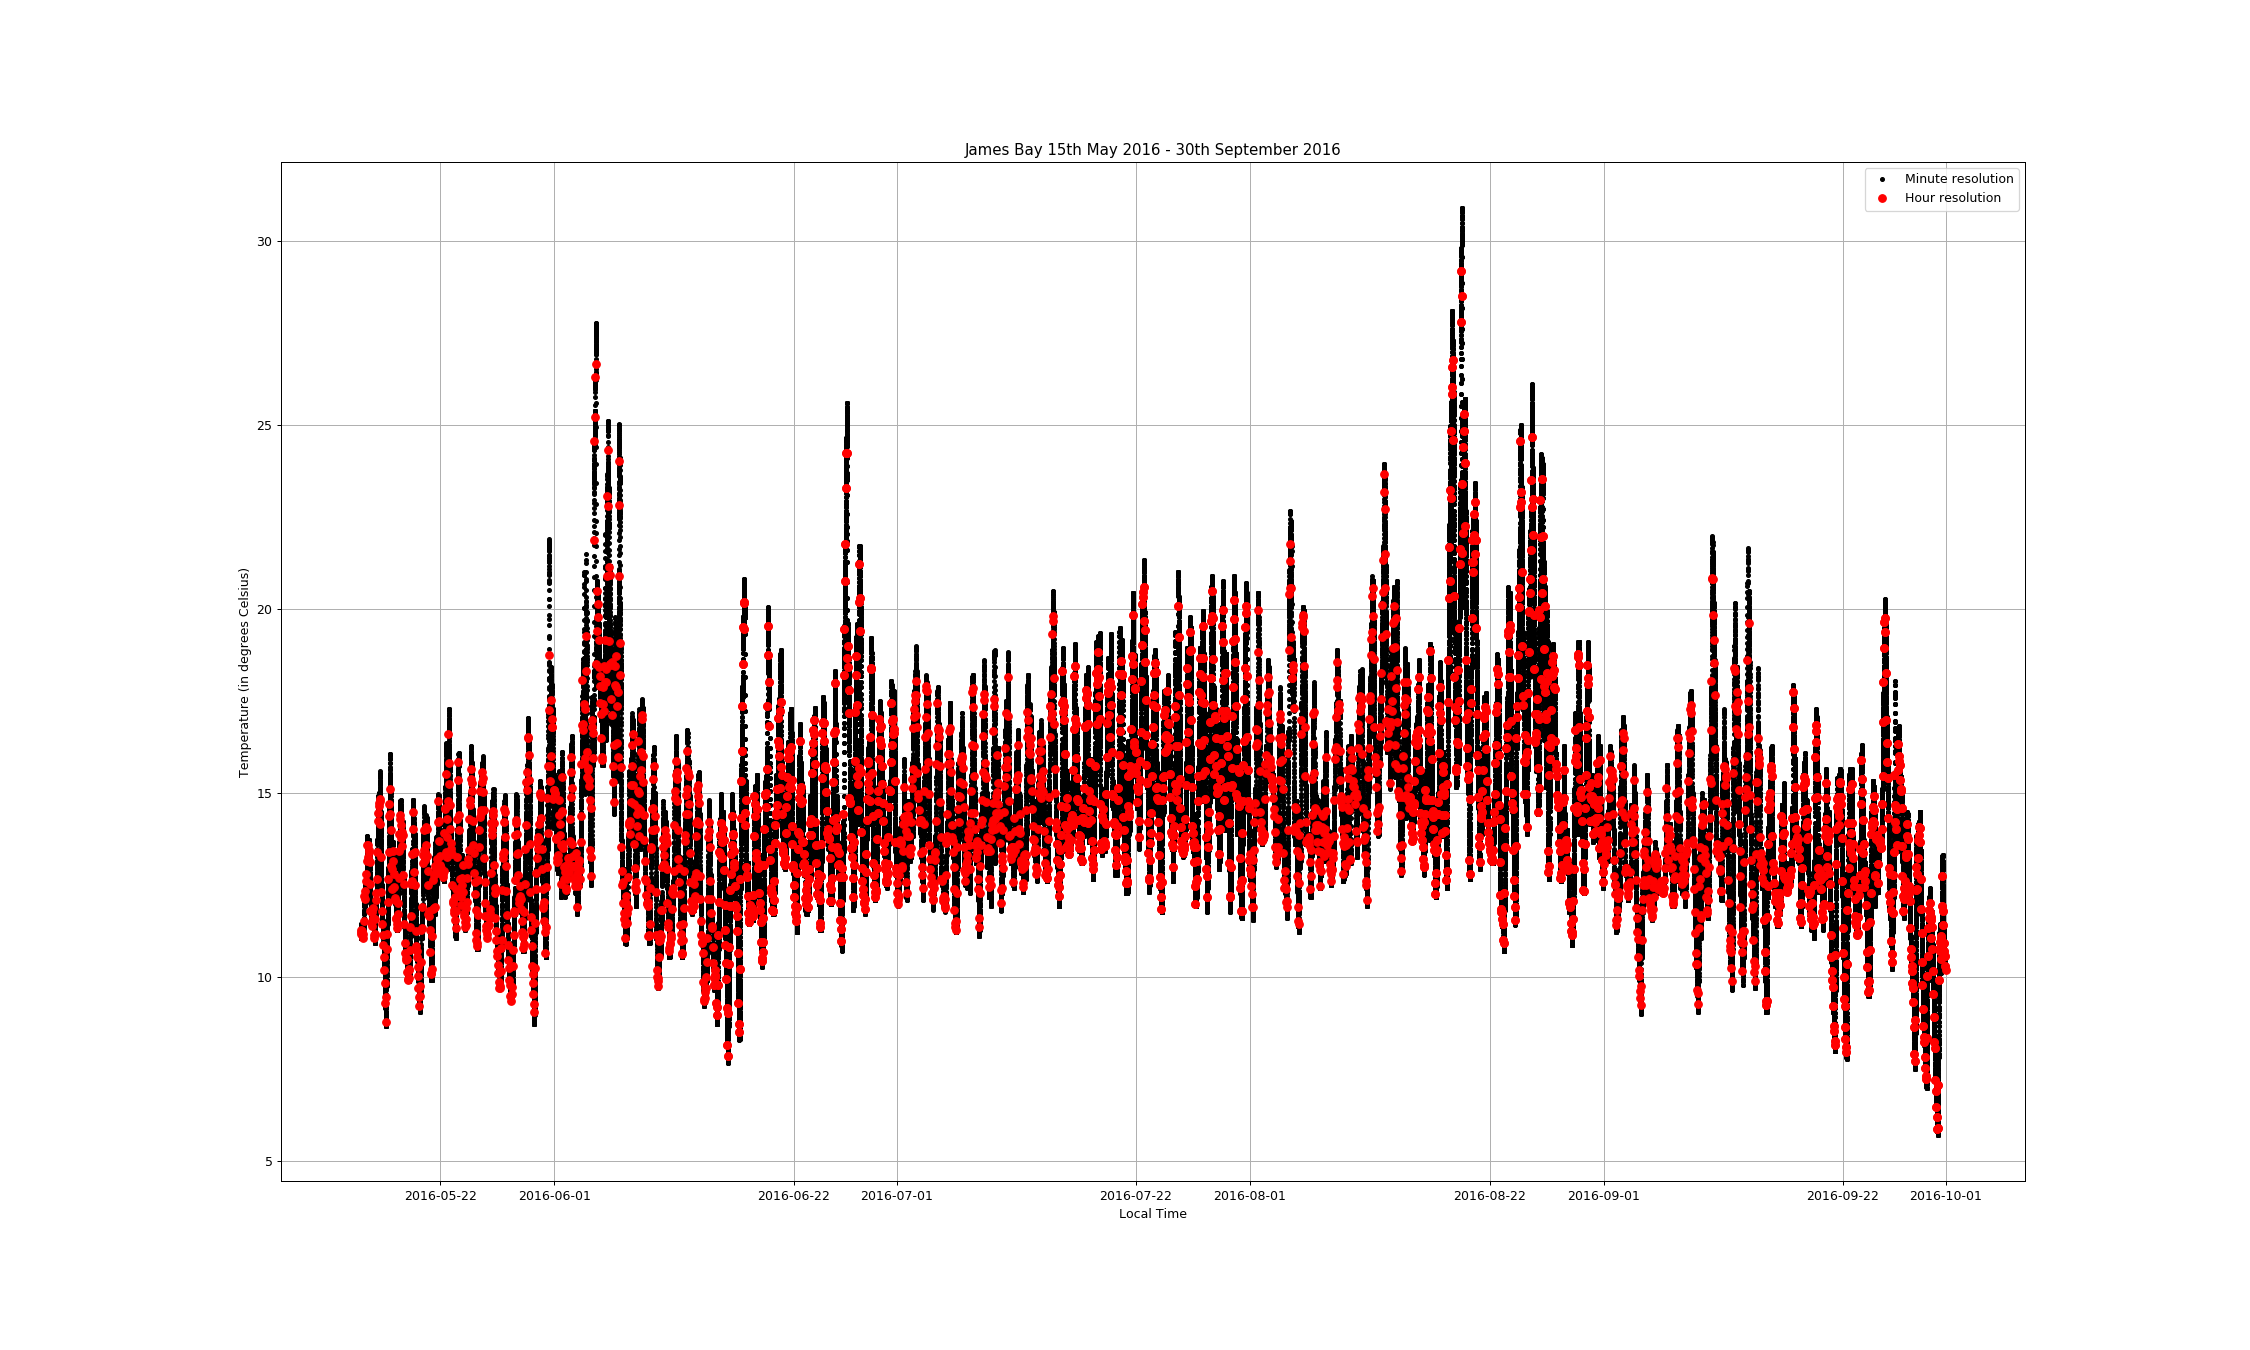

In [22]:
plt.figure(figsize=(25,15))
plt.plot(min_res_2_time, min_res_2_temp, 'k.', label="Minute resolution")
plt.plot(hour_res_2_time, hour_res_2_temp, 'ro', label="Hour resolution")
plt.title("James Bay 15th May 2016 - 30th September 2016")
plt.xlabel("Local Time")
plt.ylabel("Temperature (in degrees Celsius)")
plt.grid(True)
plt.legend()

In [23]:
plt.close()

### Removing means

In [24]:
hour_mean_1 = round(hour_1_df["Temperature"].mean(), 2)
hour_mean_2 = round(hour_2_df["Temperature"].mean(), 2)
hour_std_1 = round(hour_1_df["Temperature"].std(), 2)
hour_std_2 = round(hour_2_df["Temperature"].std(), 2)
min_mean_1 = round(min_1_df["Temperature"].mean(), 2)
min_mean_2 = round(min_2_df["Temperature"].mean(), 2)
min_std_1 = round(min_1_df["Temperature"].std(), 2)
min_std_2 = round(min_2_df["Temperature"].std(), 2)

In [25]:
print("Mean temperature in Winter 2015-2016 = ", hour_mean_1, "\u2070C")
print("Standard deviation of temperature in Winter 2015-2016 = ", hour_std_1, "\u2070C")
print()
print("Mean temperature in Summer 2016 = ", hour_mean_2, "\u2070C")
print("Standard deviation of temperature in Summer 2016 = ", hour_std_2, "\u2070C")

Mean temperature in Winter 2015-2016 =  6.95 ⁰C
Standard deviation of temperature in Winter 2015-2016 =  2.69 ⁰C

Mean temperature in Summer 2016 =  14.46 ⁰C
Standard deviation of temperature in Summer 2016 =  2.8 ⁰C


In [26]:
print("Mean temperature in Winter 2015-2016 = ", min_mean_1, "\u2070C")
print("Standard deviation of temperature in Winter 2015-2016 = ", min_std_1, "\u2070C")
print()
print("Mean temperature in Summer 2016 = ", min_mean_2, "\u2070C")
print("Standard deviation of temperature in Summer 2016 = ", min_std_2, "\u2070C")

Mean temperature in Winter 2015-2016 =  6.96 ⁰C
Standard deviation of temperature in Winter 2015-2016 =  2.7 ⁰C

Mean temperature in Summer 2016 =  14.46 ⁰C
Standard deviation of temperature in Summer 2016 =  2.83 ⁰C


In [27]:
rem1 = hour_1_df[abs(hour_1_df.Temperature - hour_mean_1) < 0.001].index

In [28]:
rem2 = hour_2_df[abs(hour_2_df.Temperature - hour_mean_2) < 0.001].index

In [29]:
rem3 = min_1_df[abs(min_1_df.Temperature - min_mean_1) < 0.001].index

In [30]:
rem4 = min_2_df[abs(min_2_df.Temperature - min_mean_2) < 0.001].index

In [31]:
hour_1_df_cut = (hour_1_df.drop(rem1)).dropna()
hour_2_df_cut = (hour_2_df.drop(rem2)).dropna()
min_1_df_cut = (min_1_df.drop(rem3)).dropna()
min_2_df_cut = (min_2_df.drop(rem4)).dropna()

## Plotting Periodograms

In [32]:
from scipy import signal

In [33]:
fs_hr = 1/(james_bay_hour_time[1] - james_bay_hour_time[0])

fs_min = 1/(james_bay_min_time[1] - james_bay_min_time[0])

In [34]:
nhr1 = len(hour_1_df_cut.Temperature)
nhr2 = len(hour_2_df_cut.Temperature)
nmin1 = len(min_1_df_cut.Temperature)
nmin2 = len(min_2_df_cut.Temperature)

In [35]:
f_hr_1, PSD_hr_1 = signal.periodogram(hour_1_df_cut.Temperature, window=np.hanning(M=int(nhr1/128)), nperseg=int(nhr1/128), nfft=nhr1, scaling='spectrum')
f_hr_2, PSD_hr_2 = signal.periodogram(hour_2_df_cut.Temperature, window=np.hanning(M=int(nhr2/128)), nperseg=int(nhr2/128), nfft=nhr2, scaling='spectrum')
f_min_1, PSD_min_1 = signal.periodogram(min_1_df_cut.Temperature, window=np.hanning(M=int(nmin1/128)), nperseg=int(nmin1/128), nfft=nmin1, scaling='spectrum')
f_min_2, PSD_min_2 = signal.periodogram(min_2_df_cut.Temperature, window=np.hanning(M=int(nmin2/128)), nperseg=int(nmin2/128), nfft=nmin2, scaling='spectrum')

<IPython.core.display.Javascript object>


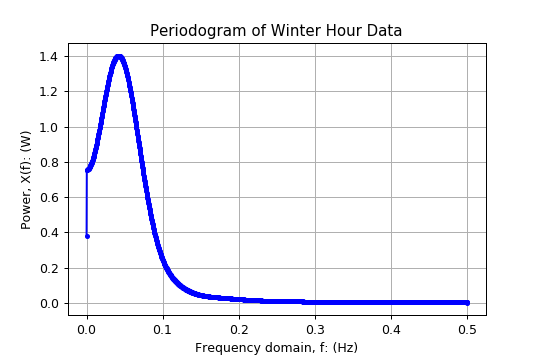

<IPython.core.display.Javascript object>


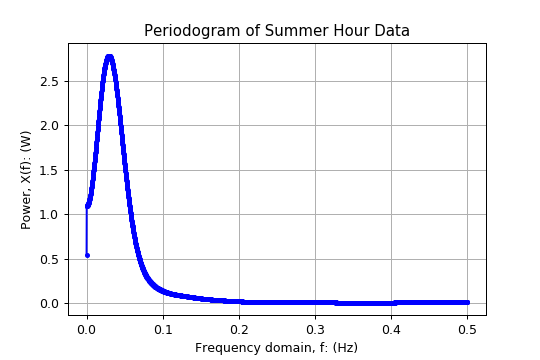

<IPython.core.display.Javascript object>


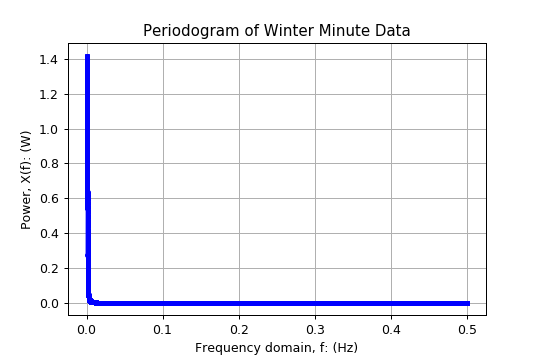

<IPython.core.display.Javascript object>


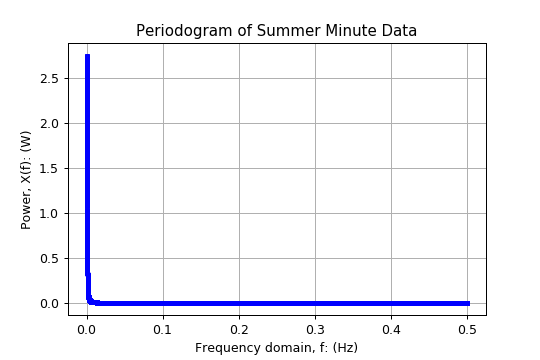

Text(0, 0.5, 'Power, X(f): (W)')

In [36]:
plt.figure()
plt.plot(f_hr_1, PSD_hr_1, 'b.-')
plt.title("Periodogram of Winter Hour Data")
plt.grid(True)
#plt.xlim(0, 90)
plt.xlabel("Frequency domain, f: (Hz)")
plt.ylabel("Power, X(f): (W)")

plt.figure()
plt.plot(f_hr_2, PSD_hr_2, 'b.-')
plt.title("Periodogram of Summer Hour Data")
plt.grid(True)
#plt.xlim(0, 90)
plt.xlabel("Frequency domain, f: (Hz)")
plt.ylabel("Power, X(f): (W)")

plt.figure()
plt.plot(f_min_1, PSD_min_1, 'b.-')
plt.title("Periodogram of Winter Minute Data")
plt.grid(True)
#plt.xlim(0, 90)
plt.xlabel("Frequency domain, f: (Hz)")
plt.ylabel("Power, X(f): (W)")

plt.figure()
plt.plot(f_min_2, PSD_min_2, 'b.-')
plt.title("Periodogram of Summer Minute Data")
plt.grid(True)
#plt.xlim(0, 90)
plt.xlabel("Frequency domain, f: (Hz)")
plt.ylabel("Power, X(f): (W)")

In [37]:
plt.close()
plt.close()
plt.close()
plt.close()

### Modules made below to find confidence interval, assuming both sets of data are normally distributed. 

In [36]:
def gaussian_curve(x, mu=0, sigma=1):
    '''
    Takes in x (or array of x) and returns Gaussian(x)
    Defaults to X ~ N(0, 1)
    But user is free to set X ~ N(mu, sigma), 
    where mu is population (or normally distributed sample) mean
    and sigma is population (or normally distributed sample) standard deviation
    
    Note: usually, y = frequency of occurence of x
    '''
    return (1/np.sqrt(2*np.pi))*(1/sigma)*np.e**(-1*((x-mu)**2)/(2*sigma**2))

In [37]:
def confidence_symm(percentage, distribution=gaussian_curve, this_sample_mean=0, this_sample_stdev=1, negative_infinity=-5, dx=1e-4):
    '''
    Returns confidence interval around given mean, for given distribution and
    standard deviation.
    
    this_sample_stdev = population* standard deviation/sqrt(sample_size)
    If not population... then of the larger sample (or set of samples) of which 
    this sample is a part of.
    
    Works only for symmetric unbounded distriubutions... like the normal distribution
    
    Obviously, one cannot perform integration from -infinity to infinity
    So user needs to specify "negative infinity".
    Since usually, we don't need more than 4 significant figures, have set
    default -infinity to -5, because
    gaussian_curve(-5) = 1.4867195147342987e-06
    '''
    alpha = 1.0 - percentage
    
    area = 0
    
    z = negative_infinity
    area += dx*distribution(z)
    
    while area < alpha/2:
        z += dx
        area += dx*distribution(z)
    
    z_alpha_by_2 = abs(z)
    
    upper = this_sample_mean + z_alpha_by_2*this_sample_stdev
    lower = this_sample_mean - z_alpha_by_2*this_sample_stdev
    
    return lower, upper 

### Minute resolution data: